# Presentation plots

This notebook has been created in order to make plots which can be used in presentations.

In [1]:
import numpy as np
import json, sys, os

import matplotlib.pyplot as plt
from matplotlib import rc, cm

# get the path of the current directory
path = os.getcwd()
home = os.path.dirname(path)

# Print the repository home directory
print("Repository home directory:",home)

# Add the src folder to the system path
sys.path.append(home+'/src')

# Import the python functions from src
from calculations import Calc, Model, Stats

# We shorten the functions name to make it easier to call the required a functions
c   = Calc()
m   = Model()
s   = Stats()

# Importing parameters from a json file.
with open(home+'/params.json') as param_file:    
   param = json.load(param_file)

# We read in the data directories we are using. To see what directories this is open params.json.
datadirs = param["datadirs"]

# We select part A which is the red end of the spectrum (the other part being B, which is the blue end)
part     = param["BetaPictoris"]["part"]

Repository home directory: /home/pas/science/exocomets


In [2]:
DP   = c.LoadData(home+'/data/Dnsn_A.npz')
spec   = c.LoadData(home+'/data/spec_A.npz')
master_spec   = c.LoadData(home+'/data/master_spec_A.npz')
ECF   = c.LoadData(home+'/data/ECF_A.npz')
w = DP[0][0][0]

In [3]:
# Setting the parameters for the plots
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

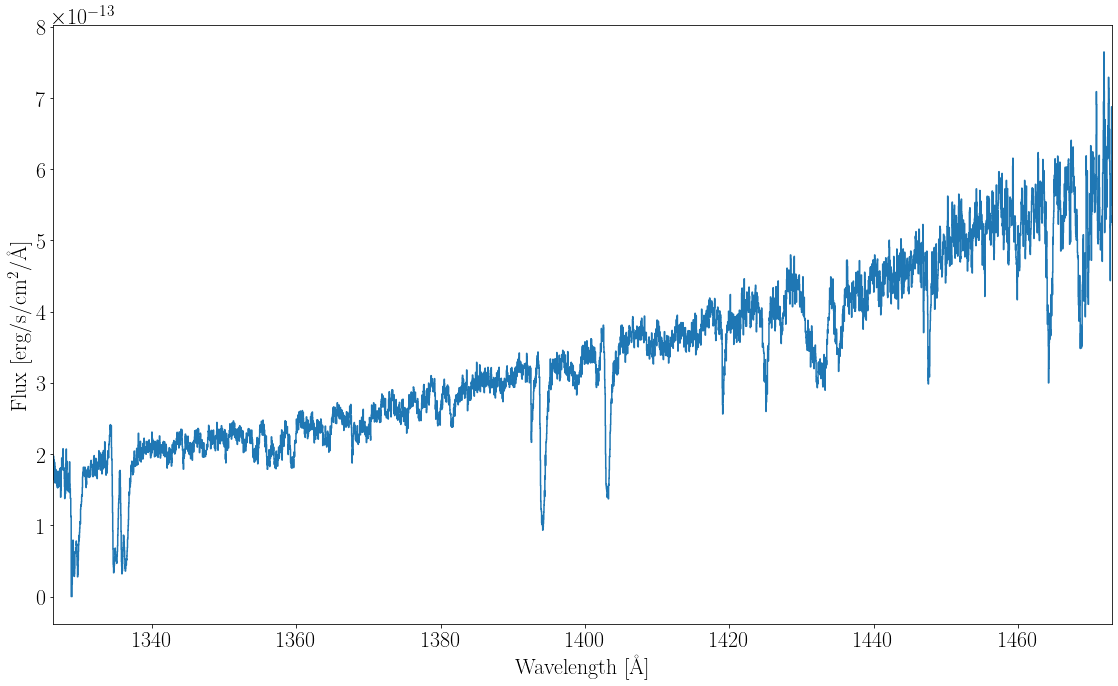

In [4]:
#%matplotlib widget
fig = plt.figure(figsize=(16.0,10.0))
bin_size = 3
for i in range(len(DP)):
    for j in range(len(DP[i])):
        if i == 4 and j == 0:
            w_bin, f_bin = c.BinXY(w,DP[i][j][1],bin_size)
            plt.step(w_bin,f_bin,label=i)
#plt.xlim(1170.4,1318)
#plt.ylim(0,4e-14)
#plt.legend()
plt.xlim(1326.25,1473)
plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()
plt.savefig(home+'/plots/presentation/part_A.jpg',dpi=150)

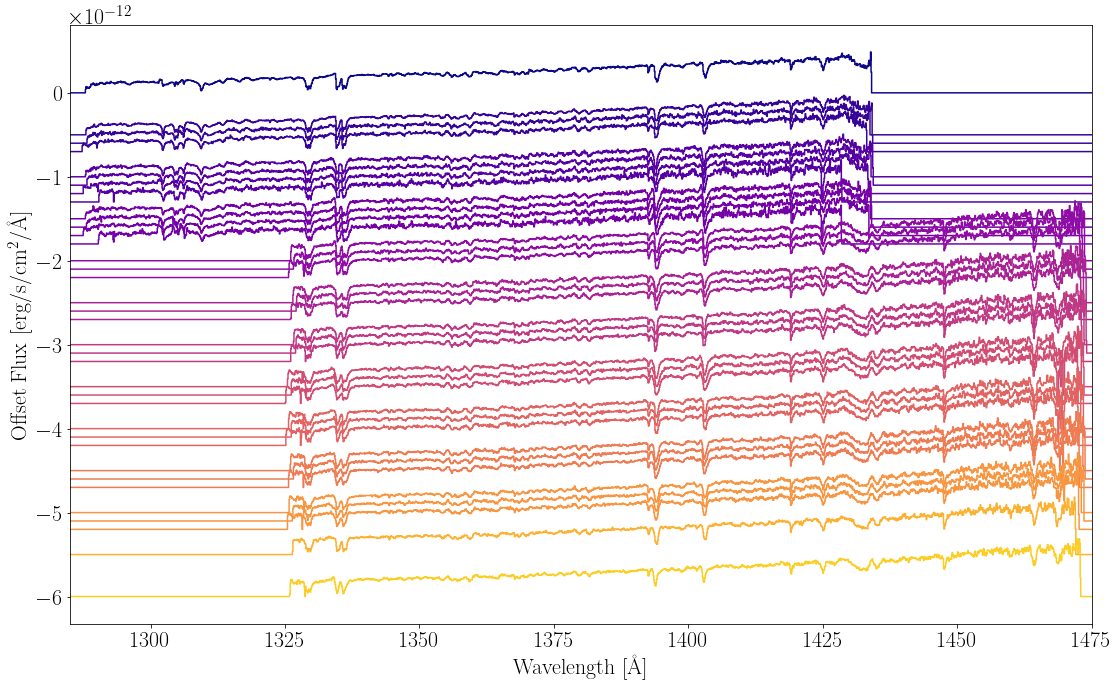

In [5]:
bin_size = 10

cool=cm.plasma(np.linspace(0.0,0.9,13)) # Create some nice colours for the plot

fig = plt.figure(figsize=(16.0,10.0))
for i in range(len(DP)):
    for j in range(len(DP[i])):
        if i != 300:
            w_bin, f_bin = c.BinXY(w,DP[i][j][1],bin_size)
            plt.step(w_bin,(f_bin-i*5e-13)-j*1e-13,label=i,color=cool[i])
plt.xlim(1285,1475)
plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Offset Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()
plt.savefig(home+'/plots/presentation/all_A_spectra.jpg',dpi=150)

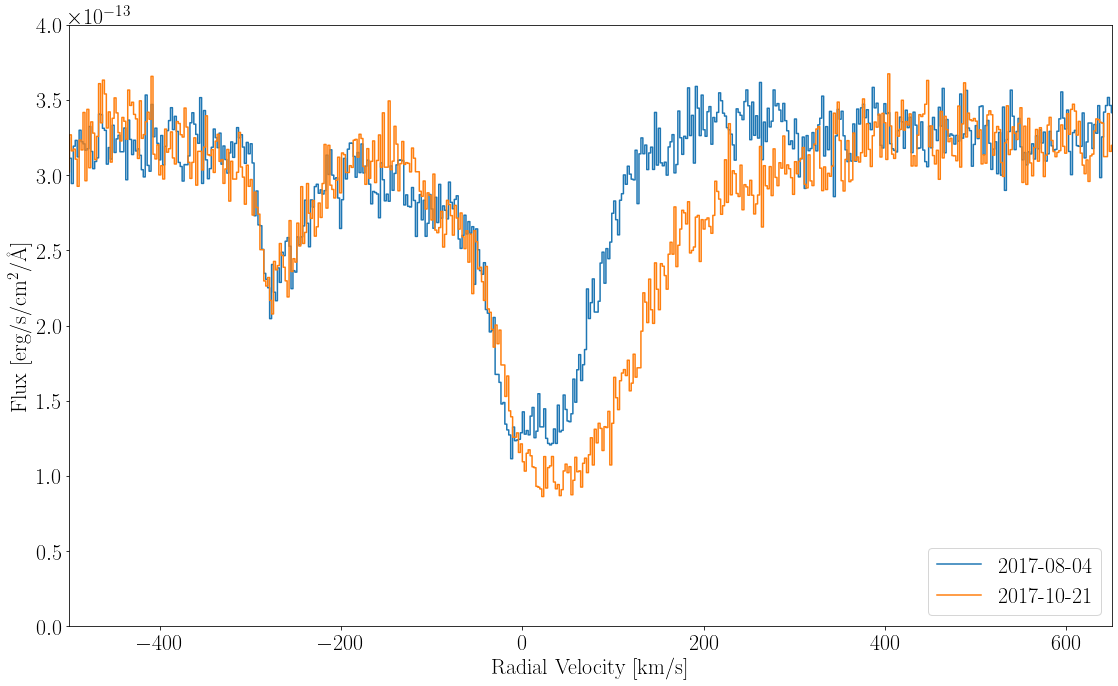

In [6]:
#%matplotlib widget
bin_size = 1
fig = plt.figure(figsize=(16.0,10.0))

rv = c.Wave2RV(w,1393.7550,20.5)

rv_bin, f_bin = c.BinXY(rv,DP[6][0][1],bin_size)
plt.step(rv_bin,f_bin,label='2017-08-04')

rv_bin, f_bin = c.BinXY(rv,DP[7][0][1],bin_size)
plt.step(rv_bin,f_bin,label='2017-10-21')


plt.xlim(-500,650)
plt.ylim(0,4e-13)
plt.legend(loc='lower right', numpoints=1)
plt.xlabel(r'Radial Velocity [km/s]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()
plt.savefig(home+'/plots/presentation/exocomet_comparison.jpg',dpi=150)